In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from trainer import Trainer, generate_data_iter
import utils
import cam

import os

In [17]:
def load_cam_pics(cam_name, model_mode, dataset, idx = 0, seed = 0):
    utils.set_random_seed(seed)
    trainer = Trainer(
        model_mode = model_mode,
        dataset = dataset,
        bs = 128,
        lr = 0.01,
        seed = seed,
        cuda = 0,
        use_lr_sche = True,
        use_wandb = False,
    )
    
    data_iter = generate_data_iter(dataset, 100, 'test')
    raw_imgs, labels = next(iter(data_iter))
    raw_imgs = np.transpose(raw_imgs.numpy(), (0, 2, 3, 1))
    cam_imgs = np.load(
        f'./thesis/cam_pics/{dataset}/{cam_name}-{dataset}-{model_mode}-seed{seed}.npy'
    )
    return raw_imgs[idx], cam_imgs[idx], labels[idx]

def plot_paper_cam_pic(cam_name, seed = 0):
    raw_fa, cam_fa, _ = load_cam_pics(cam_name, 'resnet18', 'FashionMNIST', seed = seed)
    raw_ci, cam_ci, _ = load_cam_pics(cam_name, 'resnet18', 'CIFAR10', idx = 4, seed = seed)
    raw_im_res, cam_im_res, _ = load_cam_pics(cam_name, 'resnet18', 'Imagenette', idx = 2, seed = seed)
    raw_im_dense, cam_im_dense, _ = load_cam_pics(cam_name, 'densenet121', 'Imagenette', idx = 8, seed = seed)

    raw_imgs = [raw_fa, raw_ci, raw_im_res, raw_im_dense]
    titles = ['Fashion-MNIST(ResNet)', 'CIFAR10(ResNet)', 'Imagenette(ResNet)', 'Imagenette(DenseNet)']
    cam_imgs = [cam_fa, cam_ci, cam_im_res, cam_im_dense]

    for i in range(4):
        plt.subplot(2, 4, i + 1)
        plt.imshow(raw_imgs[i])
        plt.axis('off')
        plt.title(titles[i], fontsize = 20)

    for i in range(4):
        plt.subplot(2, 4, i + 5)
        plt.imshow(cam_imgs[i])
        plt.axis('off')

    plt.tight_layout()
    plt.savefig(
        f'./thesis/pics/svg/{cam_name}.svg', 
        bbox_inches = 'tight', pad_inches = 0.03
    )
    plt.savefig(
        f'./thesis/pics/png/{cam_name}.png', 
        bbox_inches = 'tight', pad_inches = 0.03
    )
    plt.show()

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


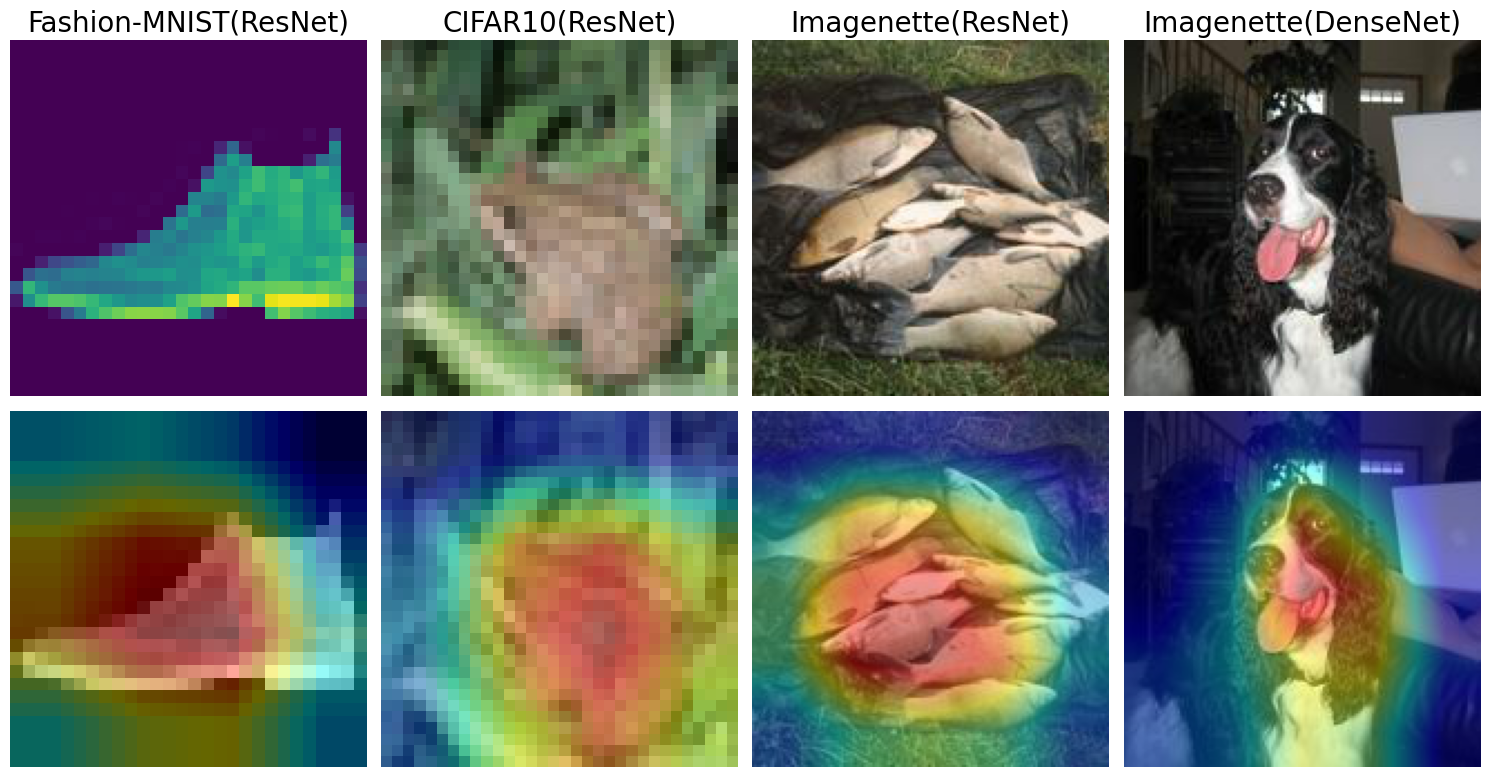

In [18]:
fig = plt.figure(figsize = (15, 8))
plot_paper_cam_pic('CAM')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


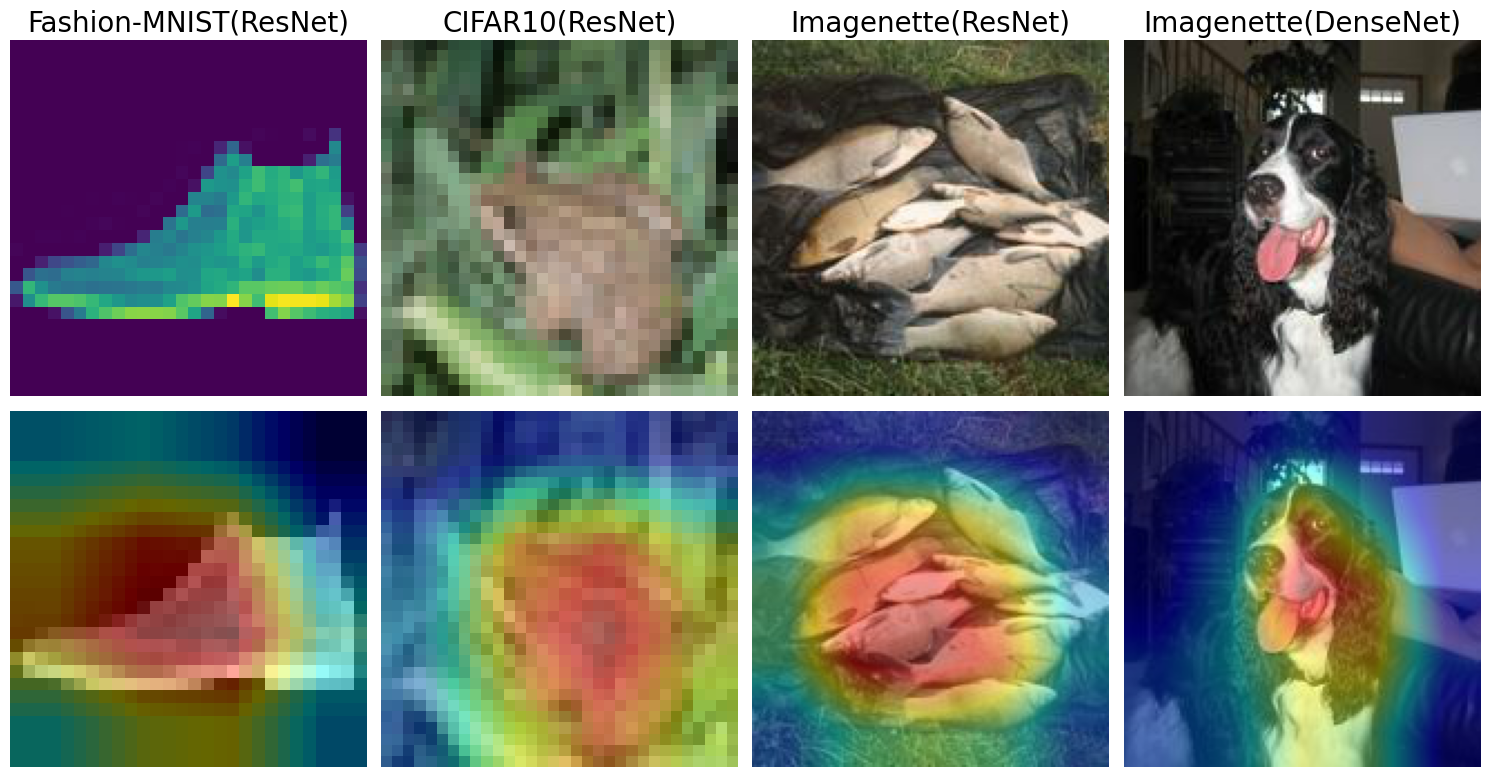

In [19]:
fig = plt.figure(figsize = (15, 8))
plot_paper_cam_pic('GradCAM')